## Learning rate

$$ W := W - \alpha { \partial \over \partial W} \text{cost}(W) $$
Where $\alpha$ is **the learning rate**.

Large learning rate ===> overshooting

Small learning rate ===> takes too long, stops at local minimum

<img src="https://cdn-images-1.medium.com/max/1200/0*QwE8M4MupSdqA3M4.png" width="400">

Try several learning rates
* Observe the cost function
* Check it goes down in a reasonable rate

## Data preprocessing (for gradient descent)


$$ \hat{x}_j = { x_j - \mu_j \over \sigma_j} $$

<img src="http://cs231n.github.io/assets/nn2/prepro1.jpeg" width="500">


In [1]:
# X_normal[:,0] = ( X[:,0] - X[:,0].mean()) / X[:,0].std()

## Overfitting

* training data 에 과도하게 최적화 되는 현상
* real data 에 대해선 잘 동작되지 않는다.

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/02/underfitting-overfitting.png" width="450">

<img src="https://cdn-images-1.medium.com/max/1600/1*JZbxrdzabrT33Yl-LrmShw.png" width="450">

Solutions for overfitting

* More training data
* features 의 개수를 줄인다
* Regularization

#### Regularization

Let's not have too big numbers in the weight

$$ Loss = { 1 \over N} \sum_i D(S(WX_i + b), L_i) + \lambda \sum W^2 $$ 

## Learning & test data sets

### Traing, Validation and test sets

1. training data 에 대해서는 이미 적응된 상태이기 때문에, 실제로 잘 동작하는지 확인을 할 수 없다. ==> test data 가 필요함!
2. 학습을 제대로 하기 위해서는 적절한 learning rate와 regularization 세기를 찾기위한 validation 작업이 있어야 한다. ==> Validation data 가 필요함!

<img src="https://t1.daumcdn.net/cfile/tistory/9951E5445AAE1BE025" width="400" >


## Online learning

* 너무 많은 양의 데이터가 있을때, 분할하여 나누어 학습을 시행
* Data 가 지속적으로 유입되는 경우 사용되기도 한다.


#### MINIST Dataset

<img src="https://cdn-images-1.medium.com/max/1600/1*9Mjoc_J0JR294YwHGXwCeg.jpeg" width="350">
* train-images-idx3-ubyte.gz: training set images (9912422 bytes)
* train-labels-idx1-ubyte.gz: training set labels (28881 bytes)
* t10k-images-idx3-ubyte.gz: test set images (1648877 bytes)
* t10k-labels-idx1-ubyte.gz: test set labels (4542 bytes)

## Accuracy

* How many of your predictions are correct?
* 95% ~ 99% ?
* Check out the lab video

## Lab 7-1 : Learning rate & Evaluation

### Training and Test datasets



In [17]:
import tensorflow as tf

x_data = [[1,2,1], [1,3,2], [1,3,4], [1,5,5], [1,7,5], [1,2,5], [1,6,6], [1,7,7]]
y_data = [[0,0,1], [0,0,1], [0,0,1], [0,1,0], [0,1,0], [0,1,0], [1,0,0], [1,0,0]]

# Evaluation our model using this test dataset
x_test = [[2,1,1], [3,1,2], [3,3,4]]
y_test = [[0,0,1], [0,0,1], [0,0,1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])
W = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Correct prediction Test model
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer],
                                      feed_dict={X: x_data, Y: y_data})
        if step % 50 == 0:
            print(step, cost_val, W_val)
        
            # prediction
            print("Prediction: ", sess.run(prediction, feed_dict={X: x_test}))
            print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

0 2.8400161 [[-0.5092531  -0.55309695  0.15962125]
 [ 0.24778174 -0.35704064 -0.8072263 ]
 [-0.12941405  0.8625646   0.43475065]]
Prediction:  [0 1 1]
Accuracy:  0.0
50 0.9097175 [[-1.1111655  -0.6879001   0.89633685]
 [-0.14410932 -0.4410277  -0.33134824]
 [ 0.3380303   0.6408248   0.18904623]]
Prediction:  [2 2 2]
Accuracy:  1.0
100 0.74956024 [[-1.4903545  -0.75329983  1.3409252 ]
 [-0.18470137 -0.4083957  -0.3233881 ]
 [ 0.5356226   0.6467464  -0.01446732]]
Prediction:  [2 2 2]
Accuracy:  1.0
150 0.6704539 [[-1.7779881  -0.7806483   1.6559069 ]
 [-0.17617482 -0.3839322  -0.35637805]
 [ 0.6428734   0.6450428  -0.12001431]]
Prediction:  [2 2 2]
Accuracy:  1.0
200 0.62001187 [[-2.0178754  -0.7861436   1.9012904 ]
 [-0.16487505 -0.3646542  -0.38695562]
 [ 0.72674996  0.6383557  -0.19720381]]
Prediction:  [2 2 2]
Accuracy:  1.0


In [18]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-10).minimize(cost)

# Correct prediction Test model
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer],
                                      feed_dict={X: x_data, Y: y_data})
        if step % 50 == 0:
            print(step, cost_val, W_val)
        
            # prediction
            print("Prediction: ", sess.run(prediction, feed_dict={X: x_test}))
            print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

0 3.2973762 [[-0.11171157 -0.1398418  -0.12182035]
 [ 0.39755306 -1.730458   -1.9189985 ]
 [-0.76861125 -0.10465971  0.4708441 ]]
Prediction:  [2 2 0]
Accuracy:  0.6666667
50 3.2973762 [[-0.11171157 -0.1398418  -0.12182035]
 [ 0.39755306 -1.730458   -1.9189985 ]
 [-0.76861125 -0.10465971  0.4708441 ]]
Prediction:  [2 2 0]
Accuracy:  0.6666667
100 3.2973762 [[-0.11171157 -0.1398418  -0.12182035]
 [ 0.39755306 -1.730458   -1.9189985 ]
 [-0.76861125 -0.10465971  0.4708441 ]]
Prediction:  [2 2 0]
Accuracy:  0.6666667
150 3.2973762 [[-0.11171157 -0.1398418  -0.12182035]
 [ 0.39755306 -1.730458   -1.9189985 ]
 [-0.76861125 -0.10465971  0.4708441 ]]
Prediction:  [2 2 0]
Accuracy:  0.6666667
200 3.2973762 [[-0.11171157 -0.1398418  -0.12182035]
 [ 0.39755306 -1.730458   -1.9189985 ]
 [-0.76861125 -0.10465971  0.4708441 ]]
Prediction:  [2 2 0]
Accuracy:  0.6666667


### Non-normalized inputs

In [28]:
import numpy as np

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
              [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
              [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
              [816, 820.958984, 1008100, 815.48999, 819.23999],
              [819.359985, 823, 1188100, 818.469971, 818.97998],
              [819, 823, 1198100, 816, 820.450012],
              [811.700012, 815.25, 1098100, 809.780029, 813.669983],
              [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])
x_data = xy[:, 0:-1]
y_data = xy[:,[-1]]

X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                  feed_dict={X: x_data, Y: y_data})
    if step % 200 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction: ", hy_val)

0 Cost:  4440626000000.0 
Prediction:  [[1487265.9]
 [2993255.5]
 [2354841.8]
 [1650949.5]
 [1945603.2]
 [1961970.9]
 [1798269.9]
 [2289351.5]]
200 Cost:  nan 
Prediction:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
400 Cost:  nan 
Prediction:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
600 Cost:  nan 
Prediction:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
800 Cost:  nan 
Prediction:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1000 Cost:  nan 
Prediction:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1200 Cost:  nan 
Prediction:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1400 Cost:  nan 
Prediction:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1600 Cost:  nan 
Prediction:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1800 Cost:  nan 
Prediction:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
2000 Cost:  nan 
Prediction:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan

In [29]:
from sklearn import preprocessing
xy = preprocessing.MinMaxScaler().fit_transform(xy)
print(xy)

[[1.         1.         0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881783 0.83755792]
 [0.54412549 0.50274824 0.57608696 0.60646801 0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.4258239  0.30434783 0.58504805 0.42624401]
 [0.49556179 0.4258239  0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


In [31]:
x_data = xy[:, 0:-1]
y_data = xy[:,[-1]]

X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                  feed_dict={X: x_data, Y: y_data})
    if step % 200 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction: ", hy_val)

0 Cost:  0.045821086 
Prediction:  [[1.2555099 ]
 [0.4145739 ]
 [0.50768864]
 [0.6131461 ]
 [0.6193191 ]
 [0.5854387 ]
 [0.31217027]
 [0.08068472]]
200 Cost:  0.045788623 
Prediction:  [[1.2551979 ]
 [0.41446897]
 [0.5075335 ]
 [0.61293745]
 [0.6191236 ]
 [0.5852525 ]
 [0.31201276]
 [0.08059844]]
400 Cost:  0.04575628 
Prediction:  [[1.2548879 ]
 [0.4143655 ]
 [0.50737953]
 [0.61272943]
 [0.61892927]
 [0.5850673 ]
 [0.3118555 ]
 [0.08051217]]
600 Cost:  0.045724012 
Prediction:  [[1.2545781 ]
 [0.4142621 ]
 [0.50722563]
 [0.6125215 ]
 [0.61873496]
 [0.58488214]
 [0.31169826]
 [0.08042589]]
800 Cost:  0.045691893 
Prediction:  [[1.2542711 ]
 [0.4141608 ]
 [0.5070735 ]
 [0.6123149 ]
 [0.6185424 ]
 [0.5846984 ]
 [0.31154162]
 [0.08033961]]
1000 Cost:  0.045659848 
Prediction:  [[1.2539642 ]
 [0.41405943]
 [0.5069213 ]
 [0.61210823]
 [0.6183498 ]
 [0.5845146 ]
 [0.311385  ]
 [0.08025336]]
1200 Cost:  0.045628134 
Prediction:  [[1.2536604 ]
 [0.41396135]
 [0.5067724 ]
 [0.61190486]
 [0.6181

## Lab 7-2 : MNIST Dataset


<img src="https://cdn-images-1.medium.com/max/1600/1*9Mjoc_J0JR294YwHGXwCeg.jpeg" width="350">
* train-images-idx3-ubyte.gz: training set images (9912422 bytes)
* train-labels-idx1-ubyte.gz: training set labels (28881 bytes)
* t10k-images-idx3-ubyte.gz: test set images (1648877 bytes)
* t10k-labels-idx1-ubyte.gz: test set labels (4542 bytes)

<img src="MNIST-1.png" width="450">
<img src="MNIST-2.png" width="450">


In [84]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch: ', '%04d' %(epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
        
    print("Accuracy: ", sess.run(accuracy,feed_dict={X: mnist.test.images, Y: mnist.test.labels}))


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch:  0001 cost =  2.573043787
Epoch:  0002 cost =  1.108057230
Epoch:  0003 cost =  0.891606407
Epoch:  0004 cost =  0.782689544
Epoch:  0005 cost =  0.713577160
Epoch:  0006 cost =  0.664424415
Epoch:  0007 cost =  0.626811342
Epoch:  0008 cost =  0.597096496
Epoch:  0009 cost =  0.571814834
Epoch:  0010 cost =  0.551115787
Epoch:  0011 cost =  0.532834988
Epoch:  0012 cost =  0.517178554
Epoch:  0013 cost =  0.503191626
Epoch:  0014 cost =  0.490593097
Epoch:  0015 cost =  0.479100942
Accuracy:  0.8878


[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Labels:  [8]
Prediction: [4]


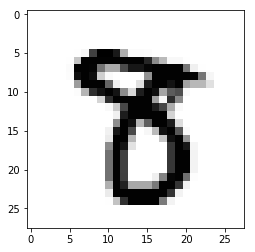

In [91]:
import matplotlib.pyplot as plt
import random
sess = tf.Session()
sess.run(tf.global_variables_initializer())
r = random.randint(0, mnist.test.num_examples -1)
print(mnist.test.labels[r:r+1])
print("Labels: ", sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print("Prediction:", sess.run(tf.argmax(hypothesis, 1),
                             feed_dict={X: mnist.test.images[r:r+1]}))
plt.imshow(mnist.test.images[r:r+1].reshape(28,28),
          cmap = "Greys", interpolation='nearest')
plt.show()